Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


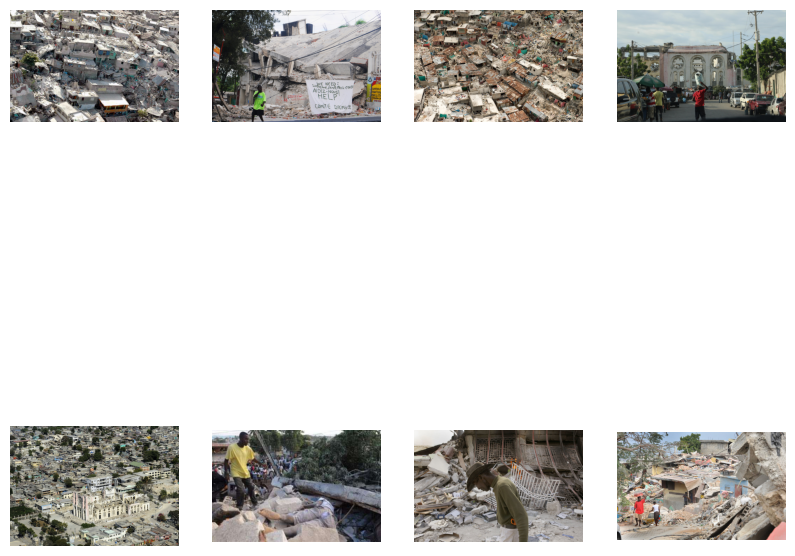

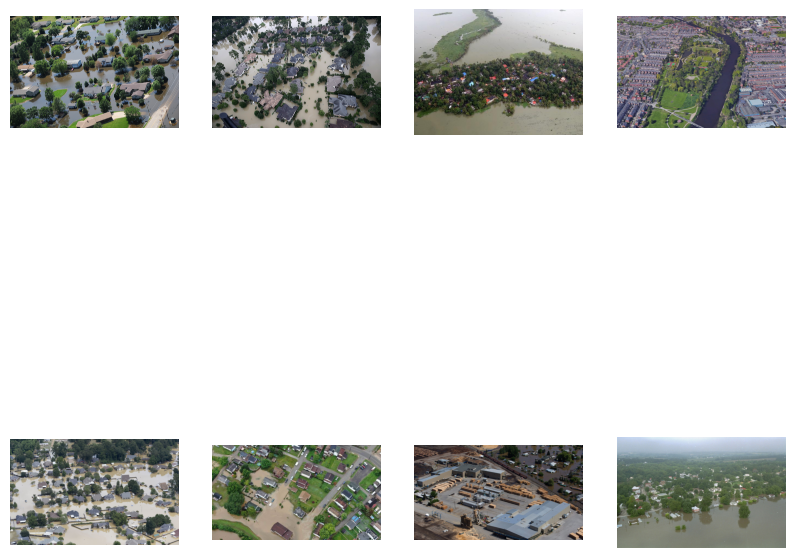

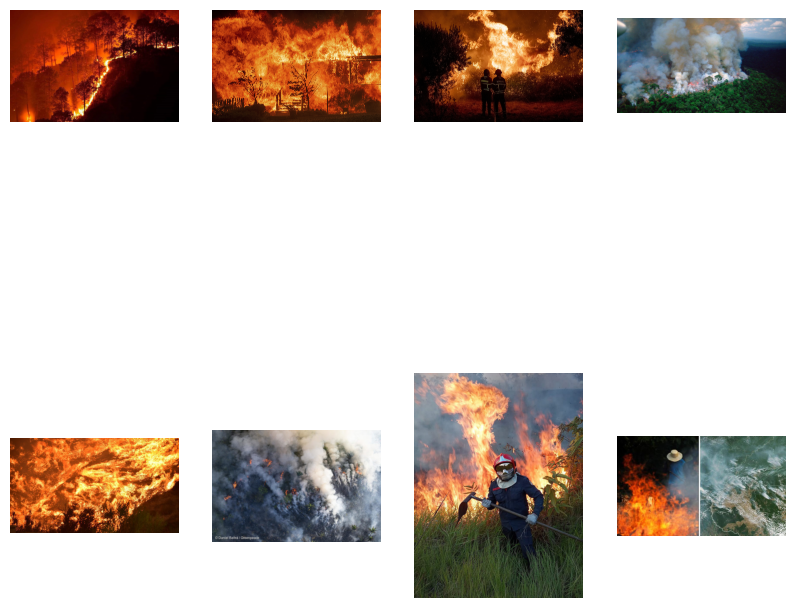

C:\Users\aditya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\aditya\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4378 - loss: 1.3764 - val_accuracy: 0.5467 - val_loss: 0.9282
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5706 - loss: 0.8417 - val_accuracy: 0.7567 - val_loss: 0.7460
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7236 - loss: 0.6573 - val_accuracy: 0.7667 - val_loss: 0.6066
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7038 - loss: 0.6801 - val_accuracy: 0.7967 - val_loss: 0.5746
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 997ms/step - accuracy: 0.7417 - loss: 0.6198 - val_accuracy: 0.8000 - val_loss: 0.4936
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 945ms/step - accuracy: 0.7761 - loss: 0.4982 - val_accuracy: 0.8233 - val_loss: 0.5990
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 936ms/step - accuracy: 0.7561 - loss: 0.5281 - val_accuracy: 0.8267 - val_loss: 0.5291
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 945ms/step - accuracy: 0.8117 - loss: 0.4264 - val_accuracy: 0.8233

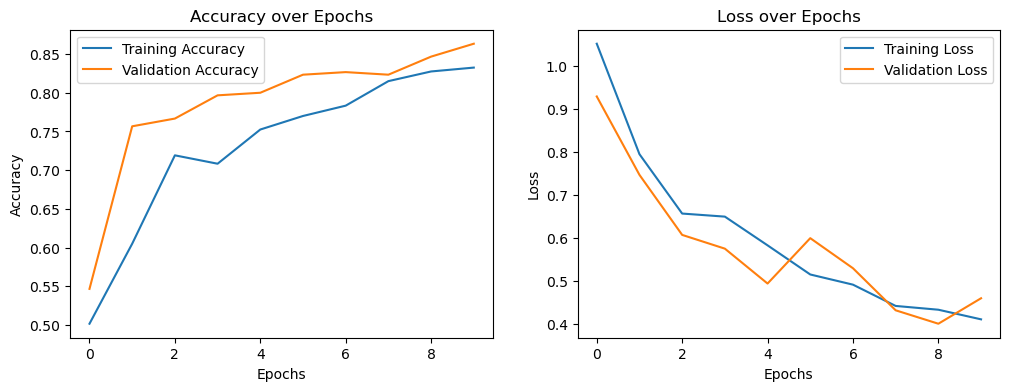

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


base_dir = r'D:\archive (1)\DisasterModel\Cyclone_Wildfire_Flood_Earthquake_Dataset'  
train_dir = r'D:\archive (1)\DisasterModel\train')
test_dir = r'D:\archive (1)\DisasterModel\test'
val_dir = r'D:\archive (1)\DisasterModel\validation'


categories = ['earthquake', 'flood', 'wildfire']


train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=categories  
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=categories  
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    classes=categories  
)


def display_sample_images(category):
    img_dir = os.path.join(train_dir, category)
    img_files = os.listdir(img_dir)
    
    plt.figure(figsize=(10, 10))
    for i, img_file in enumerate(img_files[:8]):
        img_path = os.path.join(img_dir, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(2, 4, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()


for category in categories:
    display_sample_images(category)


model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 categories (earthquake, flood, wildfire)


model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_generator, epochs=10, validation_data=val_generator)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [14]:
model.save('bestaccuracy.h5')

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


categories = ['earthquake', 'flood', 'wildfire']

def preprocess_image(img_path):
    
    img = image.load_img(img_path, target_size=(150, 150))
    
    
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    
    return img_array


def predict_image(model, img_path):
    img_array = preprocess_image(img_path) 
    
 
    prediction = model.predict(img_array)
    

    predicted_class = categories[np.argmax(prediction)]
    

    if predicted_class == 'wildfire':
        predicted_class = 'fire'
    
    return predicted_class, prediction


img_path = r'C:\Users\aditya\OneDrive\Desktop\download (4).jpeg'  


predicted_class, prediction = predict_image(model, img_path)


img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {predicted_class}')
plt.show()


print(f"Prediction: {predicted_class} with probability {np.max(prediction)}")


NameError: name 'model' is not defined

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


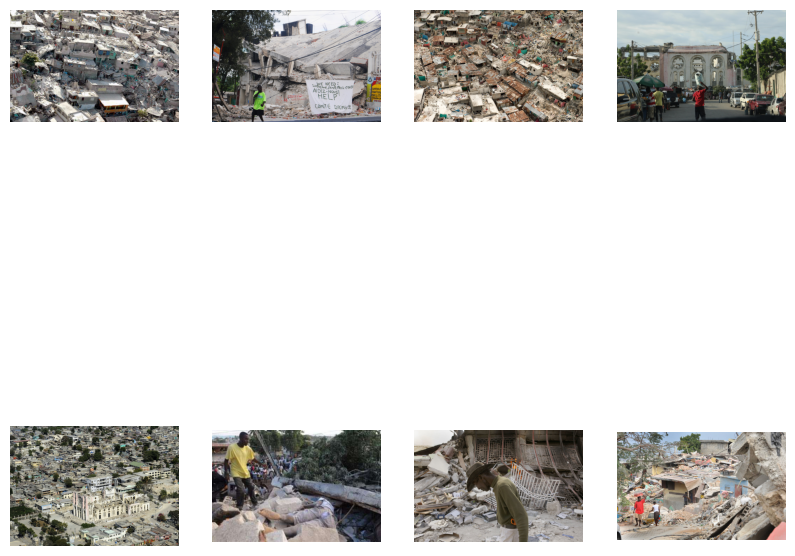

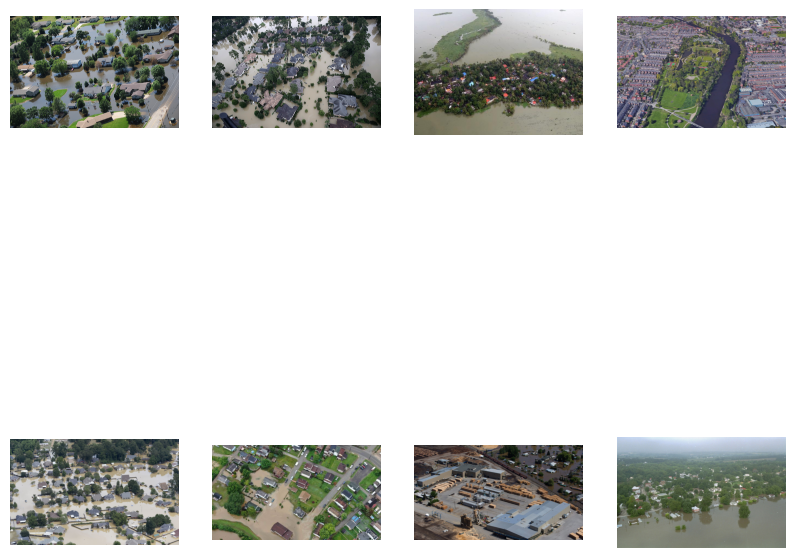

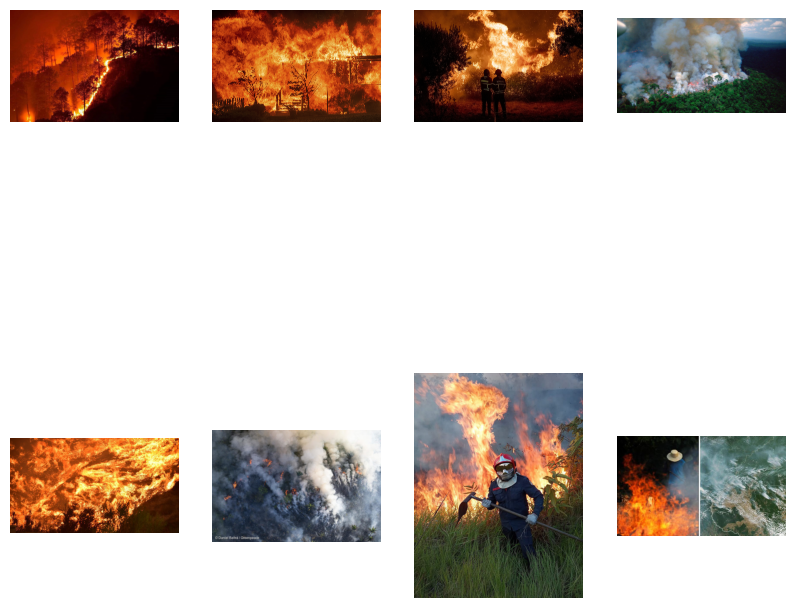

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.3874 - loss: 1.1486 - val_accuracy: 0.5300 - val_loss: 0.9815
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5564 - loss: 0.9686 - val_accuracy: 0.6200 - val_loss: 0.9548
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5449 - loss: 0.9329 - val_accuracy: 0.6233 - val_loss: 0.9412
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.5577 - loss: 0.9127 - val_accuracy: 0.5567 - val_loss: 0.9139
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.5855 - loss: 0.8696 - val_accuracy: 0.5833 - val_loss: 0.9165
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5731 - loss: 0.8860 - val_accuracy: 0.5533 - val_loss: 0.8881
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.5706 - loss: 0.8528 - val_accuracy: 0.5767 - val_loss: 0.8868
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5983 - loss: 0.8450 - val_accuracy: 0.5600 - val_loss:

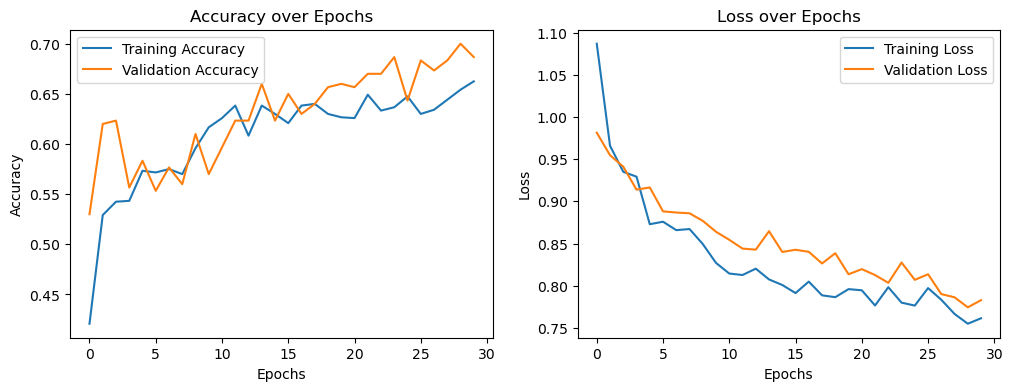

In [25]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


base_dir = r'D:\archive (1)\DisasterModel\Cyclone_Wildfire_Flood_Earthquake_Dataset'  
train_dir = r'D:\archive (1)\DisasterModel\train'
test_dir = r'D:\archive (1)\DisasterModel\test'
val_dir = r'D:\archive (1)\DisasterModel\validation'


categories = ['earthquake', 'flood', 'wildfire']


train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=categories  
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=categories  
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    classes=categories  
)


def display_sample_images(category):
    img_dir = os.path.join(train_dir, category)
    img_files = os.listdir(img_dir)
    
    plt.figure(figsize=(10, 10))
    for i, img_file in enumerate(img_files[:8]):
        img_path = os.path.join(img_dir, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(2, 4, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()


for category in categories:
    display_sample_images(category)


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  
predictions = Dense(3, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=30, validation_data=val_generator)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [12]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


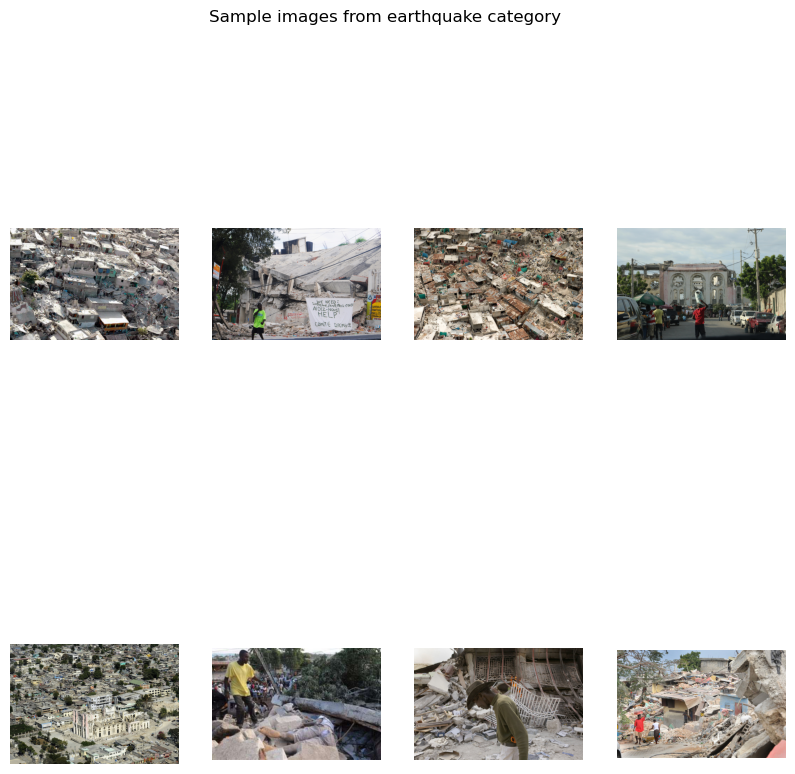

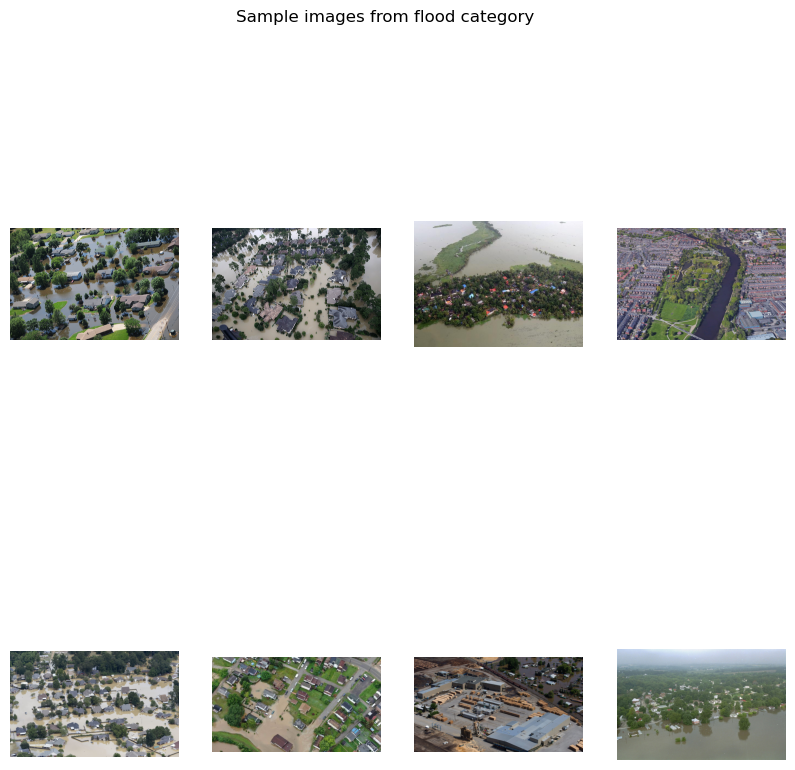

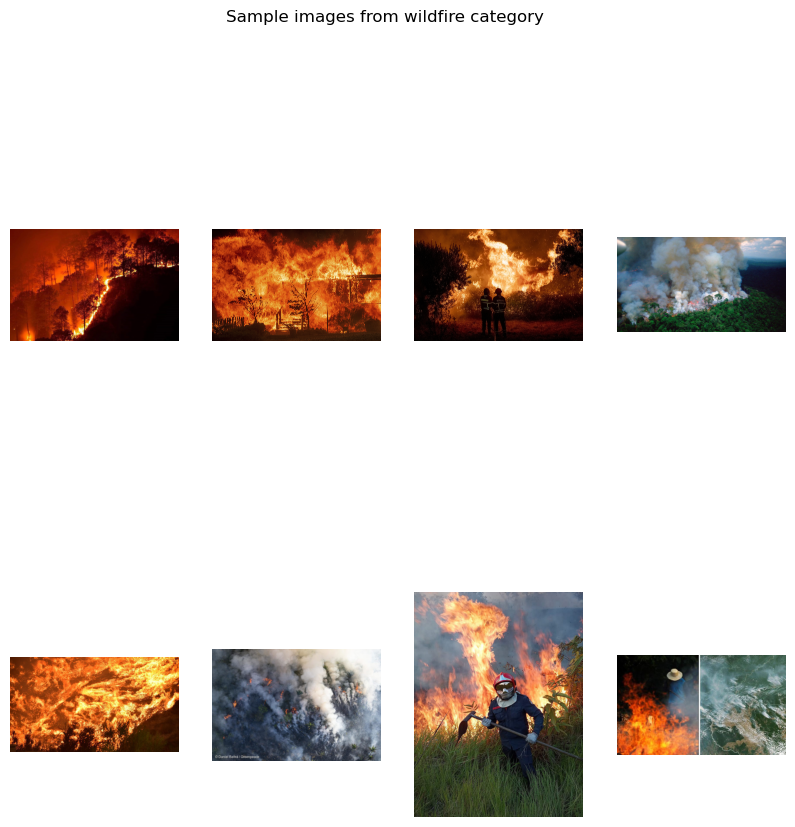

C:\Users\aditya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\aditya\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4171 - loss: 1.0653

C:\Users\aditya\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.4183 - loss: 1.0624 - val_accuracy: 0.5000 - val_loss: 0.8192
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6550 - loss: 0.7298 - val_accuracy: 0.8067 - val_loss: 0.5843
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7831 - loss: 0.5551 - val_accuracy: 0.7600 - val_loss: 0.5973
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7674 - loss: 0.5598 - val_accuracy: 0.8367 - val_loss: 0.4879
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7752 - loss: 0.5241 - val_accuracy: 0.8867 - val_loss: 0.4170
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8213 - loss: 0.4341 - val_accuracy: 0.8533 - val_loss: 0.4395
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8182 - loss: 0.4531 - val_accuracy: 0.8200 - val_loss: 0.4409
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8501 - loss: 0.3914 - val_accuracy: 0.8567 - val_loss: 0.4

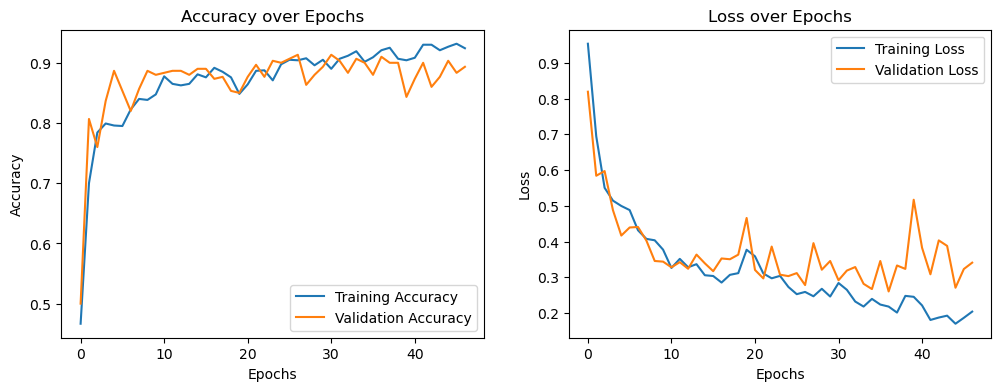

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


base_dir = r'D:\archive (1)\DisasterModel\Cyclone_Wildfire_Flood_Earthquake_Dataset'  # Update with your base directory path
train_dir = r'D:\archive (1)\DisasterModel\train'
test_dir = r'D:\archive (1)\DisasterModel\test'
val_dir = r'D:\archive (1)\DisasterModel\validation'


categories = ['earthquake', 'flood', 'wildfire']


train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=categories  # Only use the categories you want
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=categories  # Only use the categories you want
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    classes=categories  
)


def display_sample_images(category):
    img_dir = os.path.join(train_dir, category)
    img_files = os.listdir(img_dir)
    
    plt.figure(figsize=(10, 10))
    for i, img_file in enumerate(img_files[:8]):
        img_path = os.path.join(img_dir, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(2, 4, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f'Sample images from {category} category')
    plt.show()


for category in categories:
    display_sample_images(category)


model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  


model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,  
    restore_best_weights=True,  
    verbose=1  
)


history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[early_stopping] 
)


test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [4]:
model.save('bestaccuracyff.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


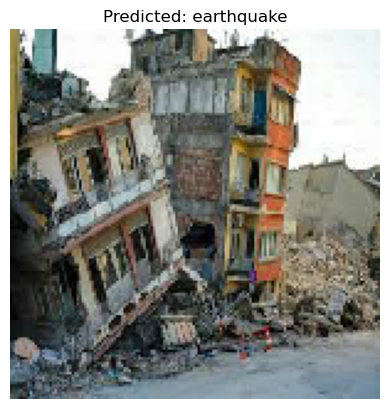

Prediction: earthquake with probability 0.948021411895752


In [7]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


categories = ['earthquake', 'flood', 'wildfire']


model_path = r'bestaccuracyff.h5'  
model = load_model(model_path)


def preprocess_image(img_path):
    
    img = image.load_img(img_path, target_size=(150, 150))
    
    
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    
    return img_array


def predict_image(model, img_path):
    img_array = preprocess_image(img_path)  
    
    
    prediction = model.predict(img_array)
    
    
    predicted_class = categories[np.argmax(prediction)]
    
    
    if predicted_class == 'wildfire':
        predicted_class = 'fire'
    
    return predicted_class, prediction


img_path = r'C:\Users\aditya\OneDrive\Desktop\images.jpeg'  


predicted_class, prediction = predict_image(model, img_path)


img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {predicted_class}')
plt.show()


print(f"Prediction: {predicted_class} with probability {np.max(prediction)}")
